# Data Ascessing

### Quality Issue:
1. **rating**: 13.8% Missing Values `Completeness`
2. **os**: 1.66% Missing Values `Completeness`
3. **card**: 0.69% Missing Values `Completeness`
4. **price**:There is ₹ and comma which needs to be removed (₹54,999). `Validity`
5. **camera**: 0.098% Missing Value `Completeness`
6. **oppo**:In some columns "Oppo" is named "OPPO", so there is consistency issue. `Consistency`
7. **price**:There is a phone named Namotel which has a price of 99, which looks like a scam. `Accuracy`
8. Some of the rows look problematic to be so I need work on it
   - processor :(row#: 642,647,649,659,667,701,750,759,819,859,883,884,919,927,929,932,1002)
   - memory:(row#: 441,485,534,553,584,610,613,642,647,649,659,667,701,750,759,819,859,884,919,927,929,932,990,1002)
   - battery:(row#: 113,151,309,365,378,441,450,553,584,610,613,630,642,647,649,659,667,701,750,756,759,764,819,855,859,884,915,916,927,929,932,990,1002)
   - display:(row#: 378,441,450,553,584,610,613,630,642,647,649,659,667,701,750,759,764,819,859,884,915,916,927,929,932,990,1002)
   - camera:(row#: 100,113,151,157,161,238,273,308,309,323,324,365,367,378,394,441,450,484,506,534,553,571,572,575,584,610,613,615,630,642,647,649,659,667,684,687,705
     711,723,728,750,756,759,764,792,819,846,854,855,858,883,884,896,915,916,927,929,932,945,956,990,995,1002,1016 )

### Tideness Issue:
1. **model**: Some phones also have information about it's storage which is not required in this column
2. **sim**: Has a lot of information like (Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC), so we can create seperate column for everything.
3. **ram**:It contains both the values of RAM and ROM, so need to seperate it.
4. **battery**: It also contains a lot of information, so I think we need to make new features (5000 mAh Battery with 100W Fast Charging)
5. **processor**:We can extract three different features from processor 


### Importing the required libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

In [2]:
smartphones=pd.read_excel("../dataset/smartphones.xlsx")
smartphones.shape

(1020, 11)

In [3]:
smartphones.head(5)

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,OnePlus 11 5G,"₹54,999",89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,OnePlus Nord CE 2 Lite 5G,"₹19,989",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,Samsung Galaxy A14 5G,"₹16,499",75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,Motorola Moto G62 5G,"₹14,999",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,Realme 10 Pro Plus,"₹24,999",82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


The index here start at 0 and in the excel it starts at 2 and since I have to work with a lot of rows it might be an issue while extracting it, so I have to reset the index

In [4]:
smartphones=smartphones.reset_index()

In [5]:
smartphones['index']=smartphones['index']+2
smartphones.head(3)

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,2,OnePlus 11 5G,"₹54,999",89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,3,OnePlus Nord CE 2 Lite 5G,"₹19,989",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,4,Samsung Galaxy A14 5G,"₹16,499",75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13


In [6]:
smartphones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      1020 non-null   int64  
 1   model      1020 non-null   object 
 2   price      1020 non-null   object 
 3   rating     879 non-null    float64
 4   sim        1020 non-null   object 
 5   processor  1020 non-null   object 
 6   ram        1020 non-null   object 
 7   battery    1020 non-null   object 
 8   display    1020 non-null   object 
 9   camera     1019 non-null   object 
 10  card       1013 non-null   object 
 11  os         1003 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 95.8+ KB


In [7]:
smartphones.describe().T

,count,mean,std,min,25%,50%,75%,max
index,1020.0,511.500000,294.592939,2.0,256.75,511.5,766.25,1021.0
rating,879.0,78.258248,7.402854,60.0,74.00,80.0,84.00,89.0


#### Working on the price feature

In [8]:
smartphones['price'].head(3)

0    ₹54,999
1    ₹19,989
2    ₹16,499
Name: price, dtype: object

In [9]:
smartphones['price']=smartphones['price'].str.replace("₹",'')
smartphones['price']=smartphones['price'].str.replace(",",'')
smartphones['price']=smartphones['price'].astype('int32')
smartphones.sample(3)

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
381,383,Samsung Galaxy A71,22494,86.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Snapdragon 730, Octa Core, 2.2 GHz Processor","8 GB RAM, 128 GB inbuilt",4500 mAh Battery with 25W Fast Charging,"6.7 inches, 1080 x 2400 px Display with Punch ...",64 MP Quad Rear & 32 MP Front Camera,"Memory Card Supported, upto 1 TB",Android v10
370,372,Sony Xperia Pro-I,134999,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 888, Octa Core, 2.84 GHz Processor","12 GB RAM, 512 GB inbuilt",4500 mAh Battery with 30W Fast Charging,"6.5 inches, 1644 x 3840 px, 120 Hz Display",12 MP + 12 MP + 12 MP Triple Rear & 8 MP Front...,"Memory Card (Hybrid), upto 1 TB",Android v11
861,863,Vivo Y91c,8199,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Helio P22, Octa Core, 2 GHz Processor","2 GB RAM, 32 GB inbuilt",4030 mAh Battery,"6.22 inches, 720 x 1520 px Display with Water ...",13 MP Rear & 5 MP Front Camera,"Memory Card Supported, upto 256 GB",Android v8.1 (Oreo)


The approach of this data cleaning is to extract only phones that are smartphones, thus I could see a trend that any phones below 3400 could be considered feature phones, thus I have dropped them.

In [10]:
smartphones=smartphones[smartphones['price']>3400]

In [11]:
smartphones.shape

(991, 12)

#### Working on the probelmatic features:

In [12]:
probl_processor=set((642,647,649,659,667,701,750,759,819,859,883,884,919,927,929,932,1002))
probl_memory=set((441,485,534,553,584,610,613,642,647,649,659,667,701,750,759,819,859,884,919,927,929,932,990,1002))
probl_battery=set((113,151,309,365,378,441,450,553,584,610,613,630,642,647,649,659,667,701,750,756,759,764,819,855,859,884,915,916,927,929,932,990,1002))
probl_display=set((378,441,450,553,584,610,613,630,642,647,649,659,667,701,750,759,764,819,859,884,915,916,927,929,932,990,1002))
probl_camera=set((100,113,151,157,161,238,273,308,309,323,324,365,367,378,394,441,450,484,506,534,553,571,572,575,584,610,613,615,630,642,647,649,659,667,684,687,705,
     711,723,728,750,756,759,764,792,819,846,854,855,858,883,884,896,915,916,927,929,932,945,956,990,995,1002,1016 ))

In [13]:
smartphones[smartphones['index'].isin(probl_processor | probl_memory | probl_battery | probl_display | probl_camera )]

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
98,100,Vivo X Fold 5G,106990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","12 GB RAM, 256 GB inbuilt",4600 mAh Battery with 66W Fast Charging,"8.03 inches, 1916 x 2160 px, 120 Hz Display",Foldable Display,50 MP Quad Rear & 16 MP Front Camera,Android v12
111,113,Apple iPhone 12,51999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt","6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
149,151,Apple iPhone 12 Mini,40999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt","5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
155,157,Nokia 2780 Flip,4990,NaN,"Dual Sim, 3G, 4G, Wi-Fi","Snapdragon QM215, Quad Core, 1.3 GHz Processor","4 GB RAM, 512 MB inbuilt",1450 mAh Battery,"2.7 inches, 240 x 320 px Display",Dual Display,5 MP Rear Camera,"Memory Card Supported, upto 32 GB"
159,161,Oppo Find N2 5G,94990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4520 mAh Battery with 67W Fast Charging,"7.1 inches, 1792 x 1920 px, 120 Hz Display wit...","Foldable Display, Dual Display",50 MP + 48 MP + 32 MP Triple Rear & 32 MP + 32...,Memory Card Not Supported
236,238,Xiaomi Mix Fold 2 5G,106990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Snapdragon 8+ Gen1 , Octa Core, 3.2 GHz Proce...","12 GB RAM, 256 GB inbuilt",4500 mAh Battery with 67W Fast Charging,"8.02 inches, 1914 x 2160 px, 120 Hz Display wi...","Foldable Display, Dual Display",50 MP + 13 MP + 8 MP Triple Rear & 20 MP Front...,Android v12
271,273,Nokia 2720 V Flip,6199,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Snapdragon 205 , Dual Core, 1.1 GHz Processor","512 MB RAM, 4 GB inbuilt",1500 mAh Battery,"2.8 inches, 240 x 320 px Display",Dual Display,2 MP Rear Camera,Memory Card Supported
306,308,Samsung Galaxy Z Flip 3,69999,84.0,"Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 888, Octa Core, 2.84 GHz Processor","8 GB RAM, 128 GB inbuilt",3300 mAh Battery with 15W Fast Charging,"6.7 inches, 1080 x 2640 px, 120 Hz Display wit...","Foldable Display, Dual Display",12 MP + 12 MP Dual Rear & 10 MP Front Camera,Memory Card Not Supported
307,309,Apple iPhone 12 (128GB),55999,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 128 GB inbuilt","6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
321,323,Samsung Galaxy Z Fold 4,154998,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4400 mAh Battery with 25W Fast Charging,"7.6 inches, 1812 x 2176 px, 120 Hz Display wit...","Foldable Display, Dual Display",50 MP + 12 MP + 10 MP Triple Rear & 10 MP + 4 ...,Android v12


In [14]:
smartphones[smartphones['index'].isin(probl_processor & probl_memory & probl_battery & probl_display & probl_camera )]

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
645,647,Nokia 2760 Flip,5490,NaN,"Dual Sim, 3G, 4G, Wi-Fi",1450 mAh Battery,"3.6 inches, 240 x 320 px Display",5 MP Rear & 5 MP Front Camera,"Memory Card Supported, upto 32 GB",Kaios v3.0,Bluetooth,NaN
882,884,Nokia 5710 XpressAudio,4799,NaN,"Dual Sim, 3G, 4G",No Wifi,Unisoc T107,"48 MB RAM, 128 MB inbuilt",1450 mAh Battery,"2.4 inches, 240 x 320 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 32 GB"
925,927,Nokia 3310 4G,3999,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","256 MB RAM, 512 MB inbuilt",1200 mAh Battery,"2.4 inches, 240 x 320 px Display",2 MP Rear Camera,"Memory Card Supported, upto 32 GB",Bluetooth,Browser


In [15]:
smartphones[smartphones['index'].isin(probl_processor)]

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
645,647,Nokia 2760 Flip,5490,NaN,"Dual Sim, 3G, 4G, Wi-Fi",1450 mAh Battery,"3.6 inches, 240 x 320 px Display",5 MP Rear & 5 MP Front Camera,"Memory Card Supported, upto 32 GB",Kaios v3.0,Bluetooth,NaN
857,859,LG Folder 2,11999,NaN,"Single Sim, 3G, 4G, Wi-Fi","1 GB RAM, 8 GB inbuilt",1470 mAh Battery,"2.8 inches, 240 x 320 px Display",2 MP Rear Camera,Memory Card Supported,Bluetooth,NaN
882,884,Nokia 5710 XpressAudio,4799,NaN,"Dual Sim, 3G, 4G",No Wifi,Unisoc T107,"48 MB RAM, 128 MB inbuilt",1450 mAh Battery,"2.4 inches, 240 x 320 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 32 GB"
925,927,Nokia 3310 4G,3999,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","256 MB RAM, 512 MB inbuilt",1200 mAh Battery,"2.4 inches, 240 x 320 px Display",2 MP Rear Camera,"Memory Card Supported, upto 32 GB",Bluetooth,Browser


In [16]:
#All of them look like a feature phone so I'll drop it
smartphones.drop([645,857,882,925],inplace=True)
smartphones.shape

(987, 12)

In [17]:
smartphones[smartphones['index'].isin(probl_memory)]

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
439,441,Apple iPhone SE 3 2022,43900,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",64 GB inbuilt,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v15,No FM Radio
483,485,Huawei Mate 50 RS Porsche Design,239999,81.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC, IR Blaster","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor",512 GB inbuilt,4700 mAh Battery with 66W Fast Charging,"6.74 inches, 1212 x 2616 px, 120 Hz Display",50 MP + 48 MP + 13 MP Triple Rear & 13 MP Fron...,"Memory Card (Hybrid), upto 256 GB",Hongmeng OS v3.0
582,584,Nokia 8210 4G,3749,NaN,"Dual Sim, 3G, 4G",No Wifi,Unisoc T107,"48 MB RAM, 128 MB inbuilt",1450 mAh Battery,"2.8 inches, 240 x 320 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 32 GB"


In [18]:
smartphones.drop(584,inplace=True)
smartphones.shape

(986, 12)

Index 439 and 483 only have the RAM but not the ROM, so I need to take this into consideration while working on splitting the RAM and ROM values.

In [19]:
smartphones[smartphones['index'].isin(probl_battery)]

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
111,113,Apple iPhone 12,51999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt","6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
149,151,Apple iPhone 12 Mini,40999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt","5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
307,309,Apple iPhone 12 (128GB),55999,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 128 GB inbuilt","6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
363,365,Apple iPhone 12 Mini (128GB),45999,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 128 GB inbuilt","5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
376,378,Nokia 2660 Flip,4649,NaN,"Dual Sim, 3G, 4G",No Wifi,Unisoc T107,"48 MB RAM, 128 MB inbuilt",1450 mAh Battery,"2.8 inches, 240 x 320 px Display",Dual Display,0.3 MP Rear Camera
439,441,Apple iPhone SE 3 2022,43900,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",64 GB inbuilt,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v15,No FM Radio
448,450,Apple iPhone 15 Pro,130990,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",Bionic A16,"8 GB RAM, 128 GB inbuilt","6.06 inches, 1170 x 2532 px, 120 Hz Display wi...",50 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v15,No FM Radio
582,584,Nokia 8210 4G,3749,NaN,"Dual Sim, 3G, 4G",No Wifi,Unisoc T107,"48 MB RAM, 128 MB inbuilt",1450 mAh Battery,"2.8 inches, 240 x 320 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 32 GB"
628,630,Apple iPhone 12 Pro (512GB),139900,80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","6 GB RAM, 512 GB inbuilt","6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v14.0,No FM Radio
754,756,Apple iPod Touch (7th Gen),18900,NaN,Wi-Fi,32 GB inbuilt,"4 inches, 640 x 1136 px Display",8 MP Rear & 1.2 MP Front Camera,iOS v12,No FM Radio,Bluetooth,Browser


Most of the apple phone looks to be problematic. It seems like for all the apple phones above there are no values for the battery and thus each rows after the battery have been shifted to the right by 1. Moreover, I am deleting all the columns that are feature phones and even index 754 since it is an ipod.

In [20]:
smartphones.drop([376,582,754],inplace=True)
smartphones.shape

(983, 12)

In [21]:
temp_df=smartphones[smartphones['index'].isin(probl_battery)]

In [22]:
temp_df.iloc[:,7:].shift(1,axis=1) #We are shifting everything to the right

,battery,display,camera,card,os
111,None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
149,None,"5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
307,None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
363,None,"5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
439,None,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v15
448,None,"6.06 inches, 1170 x 2532 px, 120 Hz Display wi...",50 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v15
628,None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v14.0
762,None,"6.1 inches, 750 x 1580 px Display",12 MP Rear & 10.8 MP Front Camera,Memory Card Not Supported,iOS v16
853,None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v14.0
913,None,"5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14


In [23]:
x=temp_df.iloc[:,7:].shift(1,axis=1).values

In [24]:
index_x=temp_df.index

In [25]:
smartphones.loc[temp_df.index,temp_df.columns[7:]]=x

In [26]:
smartphones[smartphones['index'].isin(probl_camera)] #Feature Phone: 155,271

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
98,100,Vivo X Fold 5G,106990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","12 GB RAM, 256 GB inbuilt",4600 mAh Battery with 66W Fast Charging,"8.03 inches, 1916 x 2160 px, 120 Hz Display",Foldable Display,50 MP Quad Rear & 16 MP Front Camera,Android v12
111,113,Apple iPhone 12,51999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt",None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
149,151,Apple iPhone 12 Mini,40999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt",None,"5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
155,157,Nokia 2780 Flip,4990,NaN,"Dual Sim, 3G, 4G, Wi-Fi","Snapdragon QM215, Quad Core, 1.3 GHz Processor","4 GB RAM, 512 MB inbuilt",1450 mAh Battery,"2.7 inches, 240 x 320 px Display",Dual Display,5 MP Rear Camera,"Memory Card Supported, upto 32 GB"
159,161,Oppo Find N2 5G,94990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4520 mAh Battery with 67W Fast Charging,"7.1 inches, 1792 x 1920 px, 120 Hz Display wit...","Foldable Display, Dual Display",50 MP + 48 MP + 32 MP Triple Rear & 32 MP + 32...,Memory Card Not Supported
236,238,Xiaomi Mix Fold 2 5G,106990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Snapdragon 8+ Gen1 , Octa Core, 3.2 GHz Proce...","12 GB RAM, 256 GB inbuilt",4500 mAh Battery with 67W Fast Charging,"8.02 inches, 1914 x 2160 px, 120 Hz Display wi...","Foldable Display, Dual Display",50 MP + 13 MP + 8 MP Triple Rear & 20 MP Front...,Android v12
271,273,Nokia 2720 V Flip,6199,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Snapdragon 205 , Dual Core, 1.1 GHz Processor","512 MB RAM, 4 GB inbuilt",1500 mAh Battery,"2.8 inches, 240 x 320 px Display",Dual Display,2 MP Rear Camera,Memory Card Supported
306,308,Samsung Galaxy Z Flip 3,69999,84.0,"Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 888, Octa Core, 2.84 GHz Processor","8 GB RAM, 128 GB inbuilt",3300 mAh Battery with 15W Fast Charging,"6.7 inches, 1080 x 2640 px, 120 Hz Display wit...","Foldable Display, Dual Display",12 MP + 12 MP Dual Rear & 10 MP Front Camera,Memory Card Not Supported
307,309,Apple iPhone 12 (128GB),55999,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 128 GB inbuilt",None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
321,323,Samsung Galaxy Z Fold 4,154998,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4400 mAh Battery with 25W Fast Charging,"7.6 inches, 1812 x 2176 px, 120 Hz Display wit...","Foldable Display, Dual Display",50 MP + 12 MP + 10 MP Triple Rear & 10 MP + 4 ...,Android v12


Camera columns which contains MP should be fine and camera with "foldable display" are wrong labels. So, we will only choose the rows in camera columns that do not have MP in it. Also, for rows that are problematic I have to put the card rows in camera rows.

In [27]:
smartphones.drop([155,271],inplace=True)
smartphones.shape

(981, 12)

In [28]:
temp_df2=smartphones[smartphones['index'].isin(probl_camera)] 

In [29]:
temp_df2=temp_df2[~temp_df2['camera'].str.contains("MP")]

In [30]:
smartphones.loc[temp_df.index,'camera']=temp_df['card'].values

In [31]:
smartphones

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,2,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,3,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,4,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,5,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,6,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13
...,...,...,...,...,...,...,...,...,...,...,...,...
1015,1017,Motorola Moto Edge S30 Pro,34990,83.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 68.2W Fast Charging,"6.67 inches, 1080 x 2460 px, 120 Hz Display wi...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Android v12,No FM Radio
1016,1018,Honor X8 5G,14990,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 480+, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 22.5W Fast Charging,"6.5 inches, 720 x 1600 px Display with Water D...",48 MP + 2 MP + Depth Sensor Triple Rear & 8 MP...,"Memory Card Supported, upto 1 TB",Android v11
1017,1019,POCO X4 GT 5G (8GB RAM + 256GB),28990,85.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Dimensity 8100, Octa Core, 2.85 GHz Processor","8 GB RAM, 256 GB inbuilt",5080 mAh Battery with 67W Fast Charging,"6.6 inches, 1080 x 2460 px, 144 Hz Display wit...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Memory Card Not Supported,Android v12
1018,1020,Motorola Moto G91 5G,19990,80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.8 inches, 1080 x 2400 px Display with Punch ...",108 MP + 8 MP + 2 MP Triple Rear & 32 MP Front...,"Memory Card Supported, upto 1 TB",Android v12


#### Dealing with missing values:

In [32]:
smartphones.isnull().mean()*100

index         0.000000
model         0.000000
price         0.000000
rating       10.499490
sim           0.000000
processor     0.000000
ram           0.000000
battery       1.121305
display       0.000000
camera        0.000000
card          0.000000
os            0.000000
dtype: float64

In [33]:
missing_mean=smartphones.isnull().mean()*100

In [34]:
#Dealing with features with missing values less than 5%:
missing_col=[col for col in smartphones.columns if 0<missing_mean[col]<5]
missing_col

['battery']

In [35]:
#Since the missing value is less than 5%, I'll remove these values.
print(f"We still have {round((len(smartphones.dropna(subset=missing_col))/smartphones.shape[0])*100,2)}% data left")

We still have 98.88% data left


In [36]:
smartphones.dropna(subset=['battery'],inplace=True)

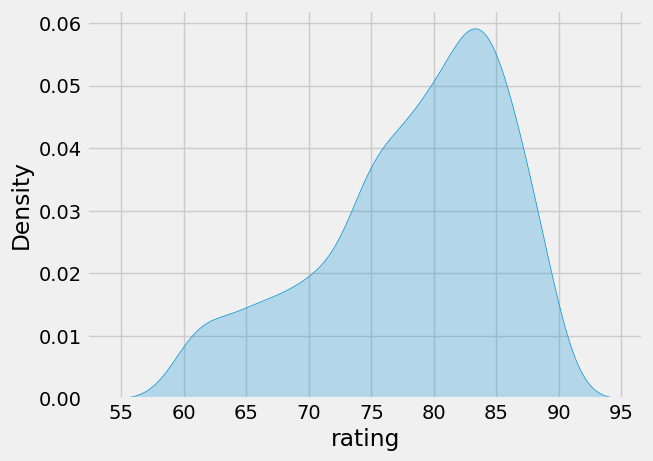

In [37]:
sns.kdeplot(data=smartphones,x='rating',fill=True)
plt.show()

In [38]:
print(f"The skewness of rating feature is: {round(smartphones['rating'].skew(),3)}")

The skewness of rating feature is: -0.704


The data is left skewed and not normally distributed, thus I beleive median imputation for the missing values would result in a better outcome,however,I'll try to do both mean and median imputation and see which preserves the origianl distribution of the rating feature.

In [39]:
#Since the missing value in the feature rating is greater than 5%, I'm planning to do either mean or median imputation:
smartphones['mean_rating']=smartphones['rating'].fillna(smartphones['rating'].mean())
smartphones['median_rating']=smartphones['rating'].fillna(smartphones['rating'].median())

In [40]:
smartphones.sample(3)

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os,mean_rating,median_rating
379,381,Realme GT 2 5G,28994,84.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 888 , Octa Core, 2.84 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 65W Fast Charging,"6.62 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Android v12,No FM Radio,84.0,84.0
563,565,POCO M4 Pro 4G (8GB RAM + 128GB),13999,81.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi, IR Blaster","Helio G96, Octa Core, 2.05 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.43 inches, 1080 x 2400 px, 90 Hz Display wit...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card Supported, upto 1 TB",Android v11,81.0,81.0
323,325,Apple iPhone 14 Plus (256GB),84999,83.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor","6 GB RAM, 256 GB inbuilt",4325 mAh Battery with Fast Charging,"6.7 inches, 1284 x 2778 px Display with Small ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v16,83.0,83.0


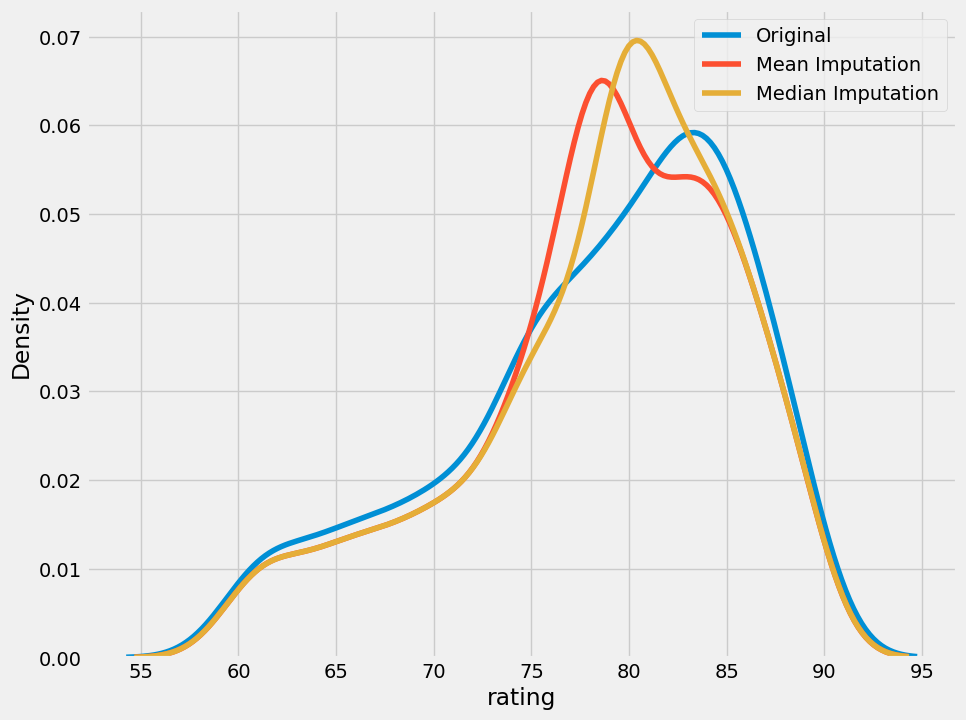

In [41]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(10,8))

sns.kdeplot(data=smartphones,x='rating',label="Original")
sns.kdeplot(data=smartphones,x='mean_rating',label="Mean Imputation")
sns.kdeplot(data=smartphones,x='median_rating',label="Median Imputation")

plt.legend()
plt.show()

Median imputation is able to do the job better so I will just go on with the median imputation.

In [42]:
smartphones.drop(columns=['rating'],inplace=True)

In [43]:
smartphones.isnull().mean()*100

index            0.0
model            0.0
price            0.0
sim              0.0
processor        0.0
ram              0.0
battery          0.0
display          0.0
camera           0.0
card             0.0
os               0.0
mean_rating      0.0
median_rating    0.0
dtype: float64

#### Creating a column named brand_name from model:

In [44]:
smartphones['brand_name']=smartphones['model'].str.split().str.get(0)

In [45]:
smartphones['RAM']=smartphones['ram'].str.split(',').str.get(0)

In [46]:
smartphones['ROM']=smartphones['ram'].str.split(',').str.get(1)